# Final Project - Owen Finucan and Jonah Smith - Team: This Project is a Waste of Our Time

Our final project aims to look at the best place to live in the Pittsburgh area by screening for the best place to commit capital crime. **NOTE: WE DEFINITELY DO NOT ADVOCATE COMMITTING ANY SORT OF CRIME.** But we will look at three metrics: arrests, gun seizures, and crime rate in the Pittsburgh Area to rank neighborhoods on how likely it is to get away with capital crime.

The formula that we will use is: Points = crimePoints * 100 / (arrestPoints * gunPoints). The higher the number of points, the better the neighborhood is to commit a capital crime.


# Arrest Rate 

Arrests will be treated as a negative for our point system. The idea here is that the more arrests in a given area, the more likely an individual is to be caught for capital crime when committing it. So, the more arrests an area has, the lower the ranking it will have. 

In [2]:
import pandas as pd # import pandas library

arrest = pd.read_csv("balls.csv", sep=",") # read csv file into pandas dataframe

arrest.head() # show first five rows of dataframe

FileNotFoundError: [Errno 2] No such file or directory: 'balls.csv'

In [ ]:
# create a dictionary to store the number of arrests in each neighborhood
arrestLocation = {}
# get the location of each arrest
arrestLoc = arrest['INCIDENTNEIGHBORHOOD']
#remove the NaN values
arrestLoc = arrestLoc.dropna()

# loop through each arrest location
for arr in arrestLoc:
    # if the neighborhood is already in the dictionary, add 1 to the count
    if arr in arrestLocation:
        arrestLocation[arr] = arrestLocation[arr]+1
    # otherwise, set the count to 1
    else:
        arrestLocation[arr] = 1


In [ ]:
ArrestLocationData = pd.DataFrame.from_dict(arrestLocation, orient = 'index', columns = ['Number of Arrests'])
ArrestLocationData["Neighborhoods"] = ArrestLocationData.index
ArrestLocationData["Neighborhoods"] = ArrestLocationData["Neighborhoods"].str.lower()
# sort the dataframe by the number of arrests

In [ ]:
ArrestLocationData = ArrestLocationData.sort_values(by = "Number of Arrests", ascending = False)
# show the top 10 neighborhoods with the most arrests

In [ ]:
ArrestLocationData["points"] = ArrestLocationData["Number of Arrests"]*.1

ArrestLocationData.head(10)


,Number of Arrests,Neighborhoods,points
Central Business District,3785,central business district,378.5
South Side Flats,3186,south side flats,318.6
Carrick,2199,carrick,219.9
East Allegheny,2014,east allegheny,201.4
Homewood South,1941,homewood south,194.1
Homewood North,1837,homewood north,183.7
East Liberty,1733,east liberty,173.3
Marshall-Shadeland,1406,marshall-shadeland,140.6
Bluff,1371,bluff,137.1
Mount Washington,1356,mount washington,135.6


<Axes: title={'center': 'Top 10 Neighborhoods with the Most Arrests'}, xlabel='Neighborhoods'>

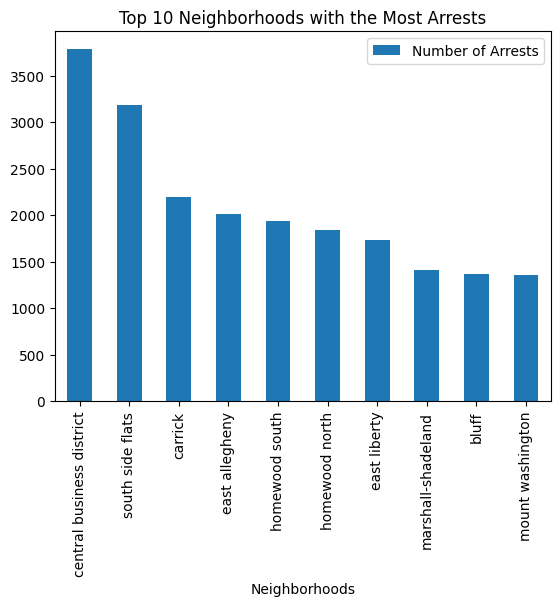

In [ ]:
#make a bar chart of the top 10 neighborhoods with the most arrests
ArrestLocationData.head(10).plot.bar(x = "Neighborhoods", y = "Number of Arrests", title = "Top 10 Neighborhoods with the Most Arrests")

# Conclusion

Central business district is the top for most number of arrests. The point data (which is inversely correlated to the number of arrests) will be added to the final tally to create the list of best places to commit capital crime.

# Guns Seized

Two of the most serious crimes are murder and homicide. In a Harvard study, it was found that there is a direct correlation between the number of guns in a community and the number of homicides (https://www.hsph.harvard.edu/hicrc/firearms-research/guns-and-death/). **Commiting a homicide is a capital crime!** 

Having guns seized in a community means that there are fewer overall guns, which decreases the chance of law enforcement being occupied with another crime, meaning you are more likely to be caught.  It also means that police/law enforcement is more active, which is terrible in our case. By looking at the number of guns seized and ranking it by the least number seized, we can see which community will be the best to get away with a capital crime!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

#Gets access to gun seizure data
gunData = pd.read_csv("gunSeizureAllData.csv",sep=",")

#Stores Data about about the number of guns found, the community, and the neighborhood
guns = gunData["total_count"].tolist()
neighborhoods = gunData["neighborhood"].tolist()

# Creates a dictionary to store the number of gun seizures by neighborhood
neighByGuns = {}

# Combinds each of the individual entries for neighborhoods with multiple seizures
for gun, neigh in zip(guns, neighborhoods):
    if str(neigh) in neighByGuns:
        if(gun > 1):
            gun = gun*3
        neighByGuns[neigh] += gun
    else:
        neighByGuns[neigh] = gun

# Prints out the result
print(neighByGuns)

{'Mount Oliver Borough': 13, 'Sheraden': 171, 'Terrace Village': 63, 'Brighton Heights': 319, nan: 1, 'Westwood': 10, 'East Liberty': 320, 'Upper Lawrenceville': 42, 'Marshall-Shadeland': 270, 'Beechview': 199, 'East Hills': 229, 'Arlington': 76, 'Arlington Heights': 18, 'Mount Washington': 126, 'South Side Flats': 304, 'Hazelwood': 238, 'Homewood South': 591, 'Greenfield': 35, 'Bloomfield': 112, 'Beltzhoover': 54, 'Homewood North': 253, 'Upper Hill': 65, 'Perry South': 218, 'Lincoln-Lemington-Belmar': 228, 'Bedford Dwellings': 129, 'Homewood West': 87, 'Carrick': 256, 'Central Northside': 145, 'Chateau': 40, 'Fineview': 117, 'Chartiers City': 4, 'Larimer': 194, 'Polish Hill': 10, 'South Shore': 17, 'Highland Park': 74, 'Knoxville': 185, 'Lower Lawrenceville': 31, 'Allentown': 165, 'Spring Hill-City View': 121, 'Garfield': 153, 'Bluff': 78, 'Overbrook': 43, 'South Side Slopes': 50, 'Central Business District': 171, 'Banksville': 10, 'Perry North': 80, 'Friendship': 11, 'Crawford-Robert

In [ ]:
# Stores the values in lists
gunsPerNeigh = list(neighByGuns.values())
neigh = list(neighByGuns.keys())

# Creating a data frame with the points value
dataFrame = pd.DataFrame(list(zip(neigh, gunsPerNeigh)), columns=["Neighborhoods", "Number of Guns Seized"])
dataFrame["Points"] = dataFrame["Number of Guns Seized"]*2

# Getting rid of invalid values
noBadDF = dataFrame.dropna()

# Sorting based off the best place (least guns seized) to live
sortDataFrameLH = noBadDF.sort_values(by=["Points"], ascending=True)

sortDataFrameLH.head()

,Neighborhoods,Number of Guns Seized,Points
88,Swisshelm Park,3,6
64,Summer Hill,3,6
84,Mt. Oliver,4,8
79,Oakwood,4,8
76,Regent Square,4,8


In [ ]:
# Sorting based off the worst place (most guns seized) to live
sortDataFrameHL = noBadDF.sort_values(by=["Points"], ascending=False)
sortDataFrameHL["Neighborhoods"] = sortDataFrameHL["Neighborhoods"].str.lower()

sortDataFrameHL.head()

,Neighborhoods,Number of Guns Seized,Points
16,homewood south,591,1182
6,east liberty,320,640
3,brighton heights,319,638
14,south side flats,304,608
8,marshall-shadeland,270,540


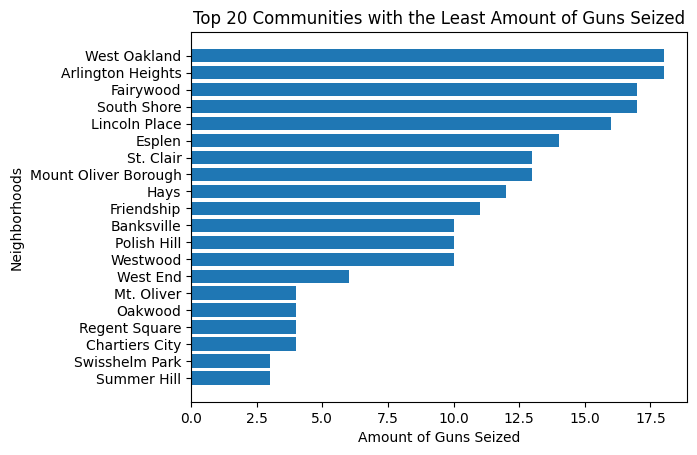

In [ ]:
# Takes all of the values of the dictionary containing neighborhoods and the number of guns seized and sorts it in ascending order
sortedValues = dict(sorted(neighByGuns.items(), key=lambda item: item[1]))

# Taking the twenty neighborhoods with the least number of guns seized
leastNeigh = (list(sortedValues.values())[1:21])
leastGuns = (list(sortedValues.keys())[1:21])


plt.barh(leastGuns, leastNeigh)
plt.xlabel("Amount of Guns Seized")
plt.ylabel("Neighborhoods")
plt.title("Top 20 Communities with the Least Amount of Guns Seized")
plt.show()

# Conclusion

Summer Hill is the area with the least amount of guns seized. The point data (which is inversely correlated to the number of gun seizures) will be added to the final tally to create the list of best places to commit capital crime.

 # Crime Rate

Crime rate will be treated as a positive metric in our point system. The idea is that with more crime, there will be more people around an individual that will be criminals, which will make getting away with crime and learning how to commit crime easier for said individual.

The dataset used listed multiple different crimes and the occurance in each of the neighborhoods. While assult and larceny are both crimes, one is clearly much worse than the other. In order to get a better idea about which neighborhoods had the worst crimes commited, a formula was applied to weight murder, assult, and rape significantly more than robbery, burglary, and larceny. The formula is as follows:

Weighted Crime Rate = ( (Number of Murders * 10) + (Number of Assults * 10) + (Number of Rapes * 10) + Number of Robberies + Number of Burglarys + Number of Larceny ) / Population

This gives a new statistic, weighted crime rate, which is on a per capita basis. The higher the weighted crime rate, the overall better the community is in our study.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

#Imports the data about crime rates
crimeRate = pd.read_csv("CrimeRateFile.csv",sep=",")


#Stores data on neighborhoods and populations
neighborhoods = crimeRate["neighborhood"].tolist()
population = crimeRate["population"].tolist()


#Stores data about crimes and their 
murder = crimeRate["number_arrests_murder"].tolist()
assult = crimeRate["number_arrests_assault"].tolist()
rapes = crimeRate["number_arrests_rape"].tolist()
robberys = crimeRate["number_arrests_robbery"].tolist()
burglarys = crimeRate["number_arrests_burglary"].tolist()
larceny = crimeRate["number_arrests_larceny"].tolist()


#Creates a dictionary to store data
neighRate = {}


#Implementing the formula
for Ne, Mu, As, Ra, Ro, Bu, La, Po in zip(neighborhoods, murder, assult, rapes, robberys, burglarys, larceny, population):
    neighRate.update({Ne : ( (10*Mu) + (10*As) + (10*Ra) + Ro + Bu + La ) / Po})
    
print(neighRate)

{'31st Ward': 0.07466420858572557, 'Allegheny Center': 1.010204081632653, 'Allegheny West': 0.30629853321829165, 'Allentown': 0.1063070210234034, 'Arlington': 0.08743169398907104, 'Arlington Heights': 0.3469079939668175, 'Banksville': 0.03384121892542101, 'Bedford Dwellings': 0.10068775790921596, 'Beechview': 0.050983416891631314, 'Beltzhoover': 0.15702341137123746, 'Bloomfield': 0.09571732902372732, 'Bon Air': 0.0861344537815126, 'Brighton Heights': 0.05200188412623646, 'Brookline': 0.049572039942938656, 'California Ave.': 0.15040953090096798, 'Carrick': 0.06287521786843973, 'Central North Side': 0.3360010162601626, 'Crafton Heights - Westwood - Oakwood': 0.03551234996528122, 'East Carnegie': 0.04536290322580645, 'East Hills': 0.09277767301527437, 'East Liberty': 0.3593981253083374, 'East North Side': 0.21751920248406603, 'Elliot': 0.06962663975782038, 'Esplen': 0.15160642570281124, 'Friendship': 0.14232209737827714, 'Garfield': 0.12135837135837135, 'Greenfield': 0.05333893322133557, 

In [ ]:
#Stores values in lists
neighWeight = list(neighRate.values())
weightedRate = list(neighRate.keys())

#Creating the data frame
df = pd.DataFrame(list(zip(neighRate, neighWeight)), columns=["Neighborhoods", "Weighted Crime Rate"])
df["Points"] = df["Weighted Crime Rate"]*100
df["Neighborhoods"] = df["Neighborhoods"].str.lower()
sortDF = df.sort_values(by=['Weighted Crime Rate'],ascending=False)

#Gets rid of invalid values
sortDF = sortDF.dropna()

sortDF.head()

,Neighborhoods,Weighted Crime Rate,Points
1,allegheny center,1.010204,101.020408
62,the strip,0.875147,87.514723
20,east liberty,0.359398,35.939813
69,west end valley,0.352239,35.223881
5,arlington heights,0.346908,34.690799


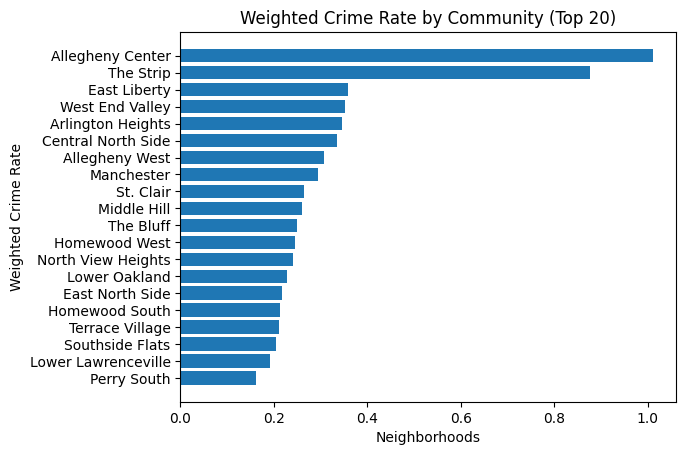

In [ ]:
# Takes all of the values of the dictionary containing neighborhoods and weighted crime rate and sorts it in ascending order
sortedValues = dict(sorted(neighRate.items(), key=lambda item: item[1]))

# Takes the highest 20 weighted crime rates and their respective communities and stores them
topCom = (list(sortedValues.values())[50:])
topRate = (list(sortedValues.keys())[50:])

# Creates a bar graph with weighted crime rate on the x-axis and community of the y-axis
plt.barh(topRate, topCom)
plt.xlabel("Neighborhoods")
plt.ylabel("Weighted Crime Rate")
plt.title("Weighted Crime Rate by Community (Top 20)")
plt.show()

# Conclusion - Crime Rate

Allegheny Center has the highest weighted crime rate with a staggering weighted crime rate of 1.01, meaning there is over 1 crime commited per individual in the community. The point data (which is positively correlated to crime rate) will be added to the final tally to create the list of best places to commit capital crime.

In [ ]:
# make a list of the neighborhoods that are in all dataframes
commonNeighborhoods = list(set(ArrestLocationData["Neighborhoods"]).intersection(set(sortDF["Neighborhoods"])))
commonNeighborhoods = list(set(commonNeighborhoods).intersection(set(sortDataFrameHL["Neighborhoods"])))

# create a new dataframe that only contains the neighborhoods that are in both dataframes, add the points from each dataframe and put it into this dataframe
commonNeighborhoodsDF = pd.DataFrame(columns = ["Neighborhoods", "Points"])
commonNeighborhoodsDF["Neighborhoods"] = commonNeighborhoods
commonNeighborhoodsDF["Points"] = 0

# loop through each neighborhood in the common neighborhoods dataframe
for i in range(len(commonNeighborhoodsDF)):
    # get the neighborhood
    neigh = commonNeighborhoodsDF["Neighborhoods"][i]
    # get the points from the arrest dataframe
    arrestPoints = ArrestLocationData[ArrestLocationData["Neighborhoods"] == neigh]["points"].values[0]
    # get the points from the crime dataframe
    crimePoints = sortDF[sortDF["Neighborhoods"] == neigh]["Points"].values[0]
    gunPoints = sortDataFrameHL[sortDataFrameHL["Neighborhoods"] == neigh]["Points"].values[0]
    # add the points from both dataframes and put it into the common neighborhoods dataframe
    commonNeighborhoodsDF["Points"][i] = (100*crimePoints) / (arrestPoints * gunPoints)
    


# sort the dataframe by the points
commonNeighborhoodsDF = commonNeighborhoodsDF.sort_values(by = "Points", ascending = False)
# show the top 10 neighborhoods with the most points
commonNeighborhoodsDF.head(10)

NameError: name 'ArrestLocationData' is not defined

# Overall Conclusion

Using the following formula, Points = crimePoints * 100 / (arrestPoints * gunPoints), we conclude that St. Clair is the best place to get away with commiting a capital crime in the Pittsburgh region.

To reitterate, we **do not** condone commiting crimes, espically capital ones, BUT none-to-less, if you *were* to commit one, St. Clair would be the place to do it. 